
## Install and Import Modules
#### Install 
Add more if needed. I have provided some installation commands but you may need others like opencv, etc if you do not have them installed yet.

In [3]:
%%capture
# %%capture is used to ignore output when content is boring.
# Install the following only if you do not have it. It contains VideoFileClip module needed in the next cell. 
!pip3 install -U imageio-ffmpeg      #This is how you install modules from jupyter notebook instead of terminal
!pip3 install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

#### Import
if errors then you may need to go back and install it first.

In [54]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import ipywidgets as ipw
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

## Watch Input <font color="violet"> Video </font>

Run the sample video I have provided first along with the whole tutorial, then

Try your own video:
- Place your video in the `Input_Video` folder
- Change <b>ONLY</b> the `video_name` in the cell below. 

In [55]:
video_name = "sample.mp4"
input_video_path = os.path.join("Input_Video", video_name)

#Erase this!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
video_name_part = video_name.split(".")    # sample & mp4 has been split
dest_path = os.path.join("Output_Video", video_name_part[0] + "_rotated." + video_name_part[1])
input_video_path = dest_path

# Watch Video                                  
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(input_video_path))                                  

## Needs Rotation?
I recorded my video with my phone in horizontal position. So I need to rotate it. Run the cells below if you also need rotation.

In [8]:
def rotateImage(image, angle):
    """"
    Performs a counter clockwise rotation of the angle specified. Set Angle to 90 to rotate left or -90 for right  
    """

    (h, w) = image.shape[:2]        # get image height, width
    cx, cy = int(w/2), int(h/2)     # calculate the center of the original image    

    # Translate image center to the right before rotation
    tx = cy-cx     #translate in x
    ty = 0         #translate in y
    M  = np.float32([[1,0,tx],[0,1,ty]])
    image = cv2.warpAffine(image, M, (h,h))       # make square image (hxh)

    # Perform the counter clockwise rotation holding at the center
    center = (cy, cy)               # calculate new center of square image
    scale  = 1.0                    # keep same dimension in image
    M = cv2.getRotationMatrix2D(center, angle, scale)
    image = cv2.warpAffine(image, M, (h, h))

    # Translate image center to the top and crop bottom
    tx = 0          #translate in x
    ty = cx-cy      #translate in y
    M  = np.float32([[1,0,tx],[0,1,ty]])
    image = cv2.warpAffine(image, M, (h,w))       # this crops bottom as well

    return image

Let's implemented on the first frame of the video to make sure everything looks okay. Set `angle` to 90 to rotate left or -90 for right

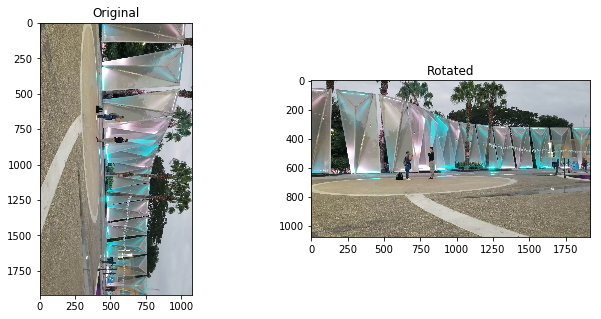

In [9]:
# Load video and Read frame
cap = cv2.VideoCapture(input_video_path)
_, frame = cap.read(0) #First frame

# Rotate to left
angle = 90
frame_rotated = rotateImage(frame , angle)

# Display
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
frame_rotated = cv2.cvtColor(frame_rotated,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(11, 5))   #width, height in inches
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(frame)

plt.subplot(1,2,2)
plt.title("Rotated")
plt.imshow(frame_rotated)

It works! So let's implemented in the whole video and place it in the `Output_Video` folder which we will create. Again set `angle` to 90 to rotate left or -90 for right

In [16]:
# Create folder to place output videos at same level directory as input folder
try:
    os.mkdir("Output_Video")
except FileExistsError:
    print ("Output Folder is ready already")
    
# Rotate video
angle = 90
clip  = VideoFileClip(input_video_path)
video_clip = clip.fl_image(lambda image: rotateImage(image, angle))

# Save rotated video 
video_name_part = video_name.split(".")    # sample & mp4 has been split
dest_path = os.path.join("Output_Video", video_name_part[0] + "_rotated." + video_name_part[1])
%time video_clip.write_videofile(dest_path, audio=False)

Output Folder is ready already
[MoviePy] >>>> Building video Output_Video/sample_rotated.mp4
[MoviePy] Writing video Output_Video/sample_rotated.mp4


100%|█████████▉| 1662/1663 [06:48<00:00,  3.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Output_Video/sample_rotated.mp4 

CPU times: user 2min 44s, sys: 5.9 s, total: 2min 50s
Wall time: 6min 52s


Let's watch it now! And reassign the input video path to our new rotated video!

In [11]:
# Reassign Input path to rotated video
input_video_path = dest_path

# Watch Video                                  
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(dest_path)) 

## Visualize and Explore Video
General info from video

In [56]:
# Load video
cap = cv2.VideoCapture(input_video_path)

# Get General Info
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

# Display
print('Frames Per Sec FPS = ' + str(fps))
print('Number of Frames   = ' + str(frame_count))
print('Duration (Sec)     = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('duration (Min:Sec) = ' + str(minutes) + ':' + str(seconds))


Frames Per Sec FPS = 30.0
Number of Frames   = 1662
Duration (Sec)     = 55.4
duration (Min:Sec) = 0:55.4


Use this to discover what frame numbers we need to set the beginnings and ends of when we turn OFF the lights in the video.

In [60]:
right = ipw.Button( description='',
                    disabled=False,
                    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
                    tooltip='Click me',
                    icon='fa-arrow-right' )
left = ipw.Button( description='',
                    disabled=False,
                    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
                    tooltip='Click me',
                    icon='fa-arrow-left') # 'fa-step-forward'
bar = ipw.IntProgress(  value=7,
                        min=0, max=frame_count-1,
                        step=100,
                        description='',
                        bar_style='', # 'success', 'info', 'warning', 'danger' or ''
                        orientation='horizontal' )

In [61]:
bar

IntProgress(value=7, max=1661)

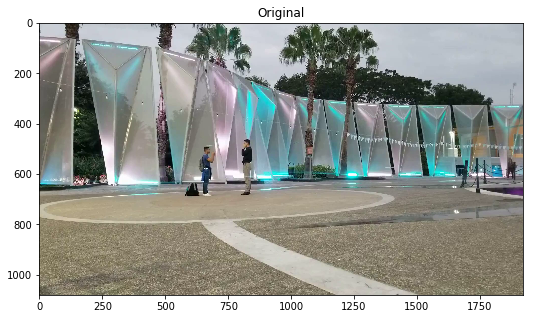

In [20]:
# show the output frame
_,frame=cap.read(0)
# Display
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(11, 5))   #width, height in inches
plt.title("Original")
plt.imshow(frame)



<b> Play the video inline by running the following cell, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.
</b>

In [ ]:
# When everything done, release the capture
cap.release()